In [1]:
using Plots
using Random

In [2]:
mutable struct track
    road::BitArray
end

function track(n::Int64)
    track(falses(n,n))
end

track

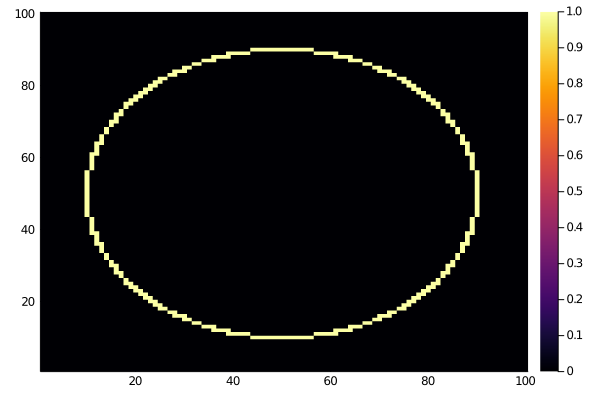

In [3]:
n = 100
R = track(100)

for i in 1:1000
    x = Int(round(40*cos(i*2*pi/1000)))+50
    y = Int(round(40*sin(i*2*pi/1000)))+50
    R.road[y, x] = true
end
plot(heatmap(R.road))

In [4]:
function bigger!(R::track,n::Int64)
    for i in 1:n
        for j in 1:n-1
            if R.road[i,j+1]
                R.road[i,j]=true
            end
            if R.road[j+1,i]
                R.road[j,i]=true
            end
            i2 = abs(i-n-1)
            j2 = abs(j-n+1)
            
            if R.road[i2,j2-1]
                R.road[i2,j2]=true
            end
            if R.road[j2-1,i2]
                R.road[j2,i2]=true
            end
        end
    end
    R
end

plot(heatmap(bigger!(R,n).road)) 

BoundsError: BoundsError: attempt to access 100×100 BitArray{2} at index [100, 0]

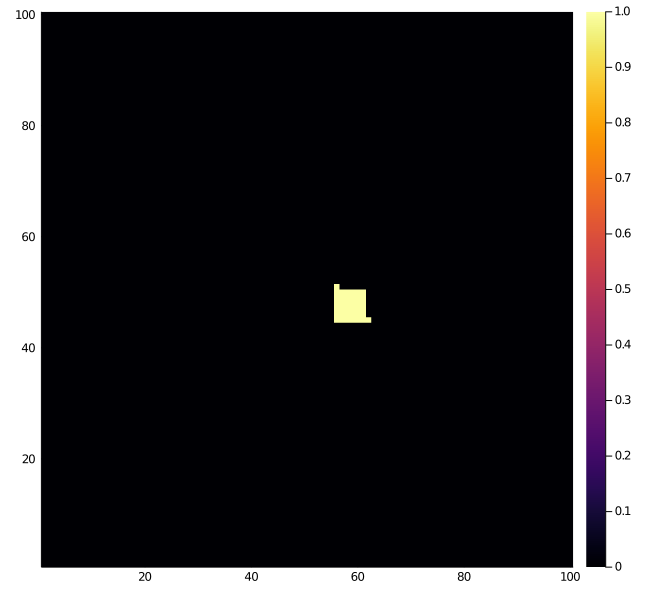

In [15]:
function right!(tr::track,pos::Int64,dir::Int64,larg::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = trues(larg)
        end
        pos = pos-1
    end
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = trues(larg)
        end
        pos = pos+n
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = trues(larg)
        end
        pos = pos+1
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = trues(larg)
        end
        pos = pos-n
    end
    
    r[pos]=true
    dir = dir-1
    
    (pos,dir)
end


function left!(tr::track,pos::Int64,dir::Int64,larg::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = trues(larg)
        end
        pos = pos+(larg)*(n+1)-n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = trues(larg)
        end
        pos = pos-(larg)*(n-1)-1
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = trues(larg)
        end
        pos = pos-(larg)*(n+1)+n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = trues(larg)
        end
        pos = pos+(larg)*(n-1)+1
    end
    
    
    r[pos]=true
    dir = dir+1
    
    (pos,dir)
end

function droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,long::Int64)
    r = tr.road
    dir2 = dir%4

    if dir2 == 0
        for i in 0:long-1
            r[pos + i*n : pos + (larg-1) + i*n] = trues(larg)
        end
        pos = pos+(long)*n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos - i*n + (long-1)] = trues(long)
        end
        pos = pos+long
    end
    
    if dir2 == 2
        for i in 0:long-1
            r[pos - i*n - (larg-1) : pos - i*n] = trues(larg)
        end
        pos = pos-(long)*n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (long-1) : pos + i*n] = trues(long)
        end
        pos = pos-long
    end
    
    r[pos]=true
    (pos,dir)
end

function long!(tr::track,pos::Int64,dir::Int64,larg::Int64)
    droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,12)
end

function short!(tr::track,pos::Int64,dir::Int64,larg::Int64)
    droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,3)
end


R = track(n)
pos = 5550
larg = 6

R.road[5550 + 1] = true
dir = 23
left!(R,pos,dir,larg)

plot(heatmap(R.road),size=(650,600))

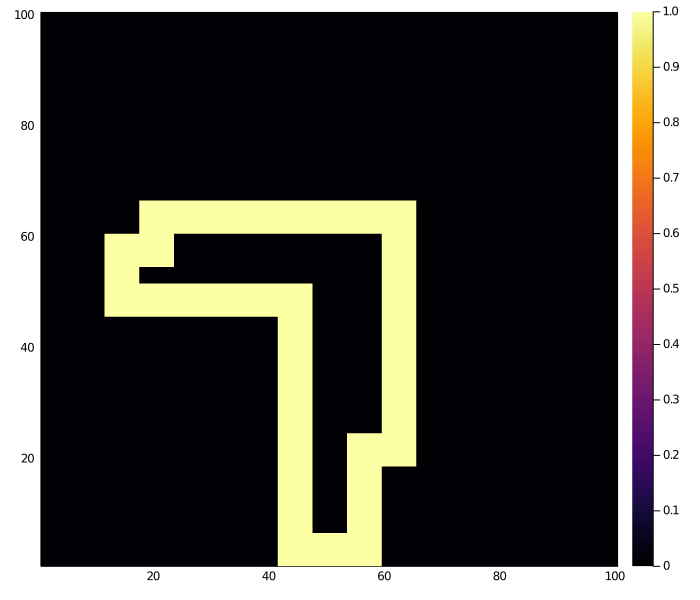

In [16]:
function build!(tr::track,L::Array{Int64})
    pos = 5001
    dir = 100
    tr.road[5001-n] = true
    for i in L
        if i == 1
            (pos,dir) = short!(tr,pos,dir,larg)
        end
        
        if i == 2
            (pos,dir) = long!(tr,pos,dir,larg)
        end
        
        if i == 3
            (pos,dir) = right!(tr,pos,dir,larg)
        end
        
        if i == 4
            (pos,dir) = left!(tr,pos,dir,larg)
        end
    end
end

R1 = track(n)
L = [1,4,2,3,4,2,2,2,4,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4,1]
#L = [1,4,2]

build!(R1,L)
plot(heatmap(R1.road),size=(700,600))

In [18]:
mutable struct car
    x::Float64
    y::Float64
    v::Float64
    angle::Float64
    a::Float64
    braq::Float64
    vmax::Float64
end

function car(x::Float64,y::Float64)
    car(x,y,0,0,5,5,10)
end

car

In [46]:
function move!(Car::car,input::Int64,dt::Float64)
    
    delta = Car.v*dt
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            #delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 4 || input == 5 || input == 6
        if Car.v<Car.vmax
            #delta = delta - 0.5*Car.a*(dt^2)
            Car.v = Car.v - Car.a*dt
        end
    end
    
    if input == 2 || input == 3 || input == 4
        Car.angle = Car.angle - delta/Car.braq
    end
    
    if input == 6 || input == 7 || input == 8
        Car.angle = Car.angle + delta/Car.braq
    end
    
    Car.x = Car.x + cos(Car.angle)*delta
    Car.y = Car.y + sin(Car.angle)*delta
end

move! (generic function with 2 methods)

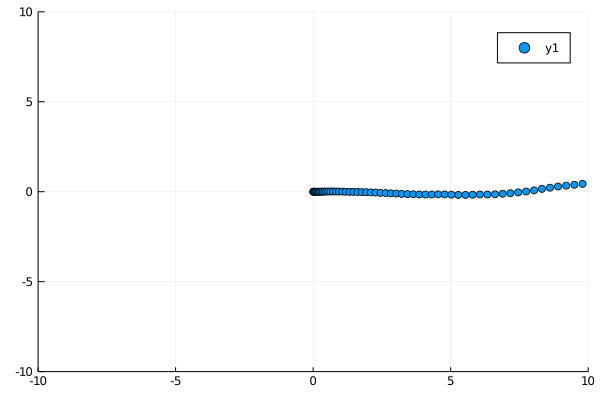

In [114]:
len = 100
dt = 0.03
Car = car(0.0,0.0)
X = zeros(len)
Y = zeros(len)
for i in 1:len
    if rand()<2/6
        move!(Car,7,dt)
        
    elseif 2/6<rand()<4/6
        move!(Car,2,dt)
    else
        move!(Car,1,dt)
    end
    X[i] = Car.x
    Y[i] = Car.y
end

plot(scatter(X,Y,xlim = (-10,10), ylim = (-10,10)))
    